In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = load_diabetes()
X, y = data.data, data.target


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [4]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]


In [6]:
# Shapes of the training and testing sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((353, 11), (353,), (89, 11), (89,))

In [7]:
# Gradient descent parameters
learning_rate = 0.01  # Step size
n_iterations = 1000   # Number of iterations
m = X_train.shape[0]  # Number of training examples



In [8]:
weights = np.zeros(X_train.shape[1])


In [9]:
def compute_mse(X, y, weights):
    predictions = X.dot(weights)
    errors = predictions - y 
    mse = (1 / (2 * m)) * np.sum(errors ** 2)
    return mse 
    

In [10]:
# Performing gradient descent
mse_history = []  # To store MSE values
for i in range(n_iterations):
    # Compute predictions
    predictions = X_train.dot(weights)
    
    # Calculate gradients
    gradients = (1 / m) * X_train.T.dot(predictions - y_train)
    
    # Update weights
    weights -= learning_rate * gradients
    
    # Calculate and record MSE
    mse = compute_mse(X_train, y_train, weights)
    mse_history.append(mse)

weights, mse_history[-1]

(array([153.72990691,   1.94483978, -11.42269492,  26.31775084,
         16.57571791,  -6.52876639,  -4.81161938,  -9.29112174,
          7.52396684,  20.70061248,   2.66702455]),
 1447.3700094942249)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [12]:
y_pred_gd = X_test.dot(weights)
mse_test_gd = mean_squared_error(y_test, y_pred_gd)


In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_sklearn = lin_reg.predict(X_test)
mse_test_sklearn = mean_squared_error(y_test, y_pred_sklearn)

mse_test_gd, mse_test_sklearn

(2884.9228029874944, 2900.1936284934827)

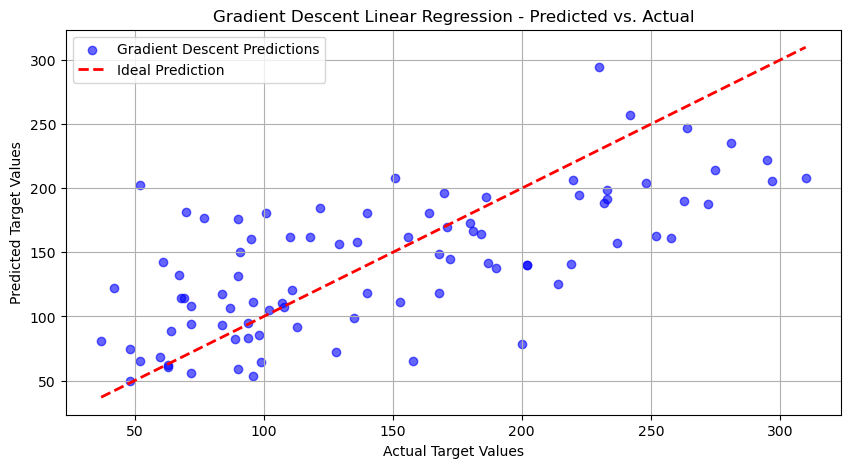

In [14]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for the testing set
plt.figure(figsize=(10, 5))

# Scatter plot for predictions using Gradient Descent
plt.scatter(y_test, y_pred_gd, color="blue", alpha=0.6, label="Gradient Descent Predictions")

# Line y=x for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Ideal Prediction")

# Add labels and title
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Gradient Descent Linear Regression - Predicted vs. Actual")
plt.legend()
plt.grid(True)
plt.show()